# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image, plot_image_misclass
from capsnet import CapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

In [4]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

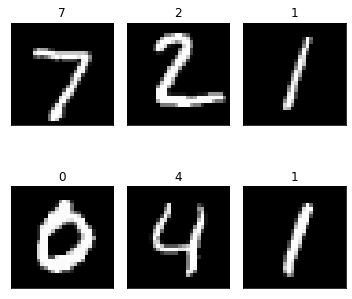

In [5]:
n_img = 6
plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)

In [6]:
# data_name_2 = 'SMALLNORB'
# dataset_2 = Dataset(data_name_2)

In [7]:
# n_img = 6
# plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)

# 2. Load Model

In [8]:
model_test = CapsNet(data_name_1, mode='test', r=3)
model_test.load_weight(114)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 256)       20992     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 6, 6, 32, 8)       5308672   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 10, 16)            1474720   
_________________________________________________________________
length (Length)              (None, 10)                0         
Total params: 6,804,384
Trainable params: 6,804,384
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 Out

# 3. Test Model

In [9]:
model_test.evaluate(dataset_1.x_test, dataset_1.y_test)
y_pred = model_test.predict(dataset_1.x_test)[0]

Test Accuracy: 99.4200%
Test Error: 0.5800%


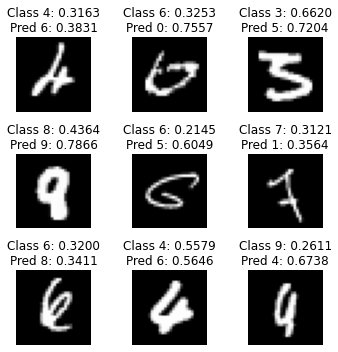

In [10]:
n_img = 9
plot_image_misclass(dataset_1.x_test, dataset_1.y_test, y_pred, dataset_1.class_names, n_img)

In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/capsnet_MNIST/log/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17404), started 0:21:03 ago. (Use '!kill 17404' to kill it.)